# Lecture 13: Statistics

CSCI 1360E: Foundations for Informatics and Analytics

## Overview and Objectives

Continuing this week's departure from Python, today we'll jump into statistics. This is yet another topic that could span an entire course, and like linear algebra I highly recommend taking a stats course at some point. By the end of this lecture, you should be able to

 - Define statistics and how to effectively employ statistical principles in answering questions
 - Understand the roles of random variables and parametric distributions
 - Compute basic first and second-order statistics on datasets

## Part 1: The Statistical Approach

![stats](Lecture13/5a8e34082ffbbe5cae7458e000596c6d.jpg)

 - One definition of statistics is that it is a way of *summarizing data*. 

 - Another definition is that statistics is *making predictions on the whole population from a sample of the population*.

Of course, these definitions are *gross* oversimplifications, but I'll illustrate with an example.

### Example: Giving a Talk

You're an intern at the Large Hadron Collider (LHC), and you've been instrumental in devising the experiments that seem to have uncovered hard evidence for the existence of the Higgs Boson. This evidence consists of the results of *billions* of subatomic collisions taking place deep in the bowels of the LHC.

Some high-level executives from the funding agencies responsible for keeping the lights on at the LHC want to hear about these exciting results, but all your immediate bosses are indisposed and have asked you to step in.

How do you present the findings? Do you provide a raw list of the billions of collisions? Do you take some averages of the data? How many? How representative of the full billion data points are these handful of averages? Can you quantify the uncertainty in these averages, i.e. how far off they could potentially be?

### Example: Do first babies arrive late?

    "My two friends that have given birth recently to their first babies, BOTH went almost 2 weeks overdue before going into labor or being induced."
    "My first one came 2 weeks late and now I think the second one is going to come out two weeks early!!"
    "I don’t think that can be true because my sister was my mother's first and she was early, as with many of my cousins."

What are the problems with this?

 - **Small number of observations.** If the gestation period is longer for first babies, the difference is probably small compared to the natural variation. In that case, we might have to compare a large number of pregnancies to be sure that a difference exists.

 - **Selection bias.** People who join a discussion of this question might be interested because their first babies were late. In that case the process of selecting data would bias the results.

 - **Confirmation bias.** People who believe the claim might be more likely to contribute examples that confirm it. People who doubt the claim are more likely to cite counterexamples.

 - **Inaccuracy.** Anecdotes are often personal stories, and often misremembered, misrepresented, repeated inaccurately, etc.

How might we address these limitations?

There is a general sequence of steps you can follow to maximize your chances of robustly answering a question in a data-driven, quantitatively significant way.

 - **Data collection.** Collect broad, unbiased, varied data related to the question you want to answer.

 - **Descriptive statistics.** Generate statistics that summarize the data concisely, and evaluate different ways to visualize data.

 - **Exploratory data analysis.** Look for patterns, differences, and other features that address the questions you're interested in. At the same time check for inconsistencies and identify limitations.

 - **Hypothesis testing.** Where there are apparent effects, like a difference between two groups, evaluate whether the effect is real, or whether it might have happened by chance.

 - **Estimation.** Use data from a sample to estimate characteristics of the general population.

## Part 2: Computing Statistics

Once we've collected data, we need to compute descriptive statistics.

You can probably name some of the statistics we'll compute and use; it's important to note that statistics live in a hierarchy

### First-order statistics

First-order statistics are summaries of the data that rely only on the data itself.

In [1]:
import numpy as np
np.random.seed(29384924)

In [2]:
data = np.random.randint(10, size = 100)  # 100 random numbers, from 0 to 9
print(data)

[6 2 6 2 7 3 8 8 3 5 7 8 5 6 7 8 8 1 4 1 1 4 0 8 0 7 1 7 8 4 4 8 3 8 1 0 9
 2 8 1 5 2 2 3 1 8 9 4 7 6 3 0 8 4 5 5 5 8 2 7 7 4 4 8 9 7 9 4 0 8 5 7 8 5
 2 3 3 6 1 9 0 2 7 5 3 1 2 5 6 9 7 0 3 6 5 8 6 2 2 6]


Some very straightforward statistics are the number of data points, the largest value, and the smallest value. These shouldn't be immediately ignored, but they are of limited utility.

In [3]:
print("Number of data points: ", data.shape[0])  # Remember our friend, ndarray.shape?

Number of data points:  100


In [4]:
print("Largest value: ", data.max())

Largest value:  9


In [5]:
print("Smallest value: ", data.min())

Smallest value:  0


**Mean**: You've seen this all the time--it's the average of all the data!

In [6]:
print(data.mean())  # Mean

4.77


The mean is very simple to compute: it's the sum of the data divided by the number of data points. The mean depends at least a little bit on every single data point. This can be advantageous in certain situations, as it varies *smoothly* as more data points are added or some are removed.

However, this property can also be problematic. A famous example that exploits this weakness is that in the mid-1980s, the major at UNC with the highest average starting salary was geography...however, this was mostly on account of a particular NBA star by the name of Michael Jordan.

In [7]:
outlier = np.array([1, 1, 2, 3, 2, 1, 3, 2, 38])  # Note the outlier of 38 at the end.
print(outlier.mean())

5.88888888889


The mean is *sensitive to outliers*, meaning one or two data points that lie well beyond all the others can disproportionately affect the value of the mean. In the above simple example, the lone outlier of 38 pulls the mean to be larger than all the other data points except for 38; not exactly a representative statistic!

**Median**: The "middle" data point. 

In [8]:
print(np.median(data))


5.0


The median is computed by:

 1. sorting all your data, and
 2. picking out the middle value (or averaging the two middle data points, if you have an even amount of data)

In this way, the median does not *directly* depend on the vast majority of your data; just on whatever value(s) happen to be in the middle. It is also not trivial to compute: you have to sort your data first, which might be tricky if you have billions of data points.

On the other hand, the median is *not* sensitive to outliers. In fact, it's *robust* to outliers, meaning it wholesale ignores them.

In [9]:
print(outlier)

[ 1  1  2  3  2  1  3  2 38]


In [10]:
print(np.median(outlier))

2.0


For comparison:

In [11]:
print(np.mean(outlier))

5.88888888889


Quite a difference! But which is more representative of data will, ultimately, depend on your data and what you're trying to do with it.

### Second-order statistics

Second-order statistics rely both on the data itself, and first-order statistics, to compute.

**Variance**: This measures how *spread out* your data are. More specifically, it measures how much your data *varies* from its mean.

In [12]:
print(data)

[6 2 6 2 7 3 8 8 3 5 7 8 5 6 7 8 8 1 4 1 1 4 0 8 0 7 1 7 8 4 4 8 3 8 1 0 9
 2 8 1 5 2 2 3 1 8 9 4 7 6 3 0 8 4 5 5 5 8 2 7 7 4 4 8 9 7 9 4 0 8 5 7 8 5
 2 3 3 6 1 9 0 2 7 5 3 1 2 5 6 9 7 0 3 6 5 8 6 2 2 6]


In [13]:
print(data.var())

7.6371


The variance is computed by subtracting each individual data point from the average of the whole data set, squaring this difference, and summing all these differences together before finally dividing by the number of data points.

Variance may not be familiar, but you've probably heard of its relative: *standard deviation* is just the square root of the variance!

In [14]:
print(np.sqrt(data.var()))

2.76353035084


In [15]:
print(data.std())

2.76353035084


(they should indeed both show the same number--this is just to show that the standard deviation is defined precisely as the square root of the variance)

Like the mean, variance (and standard deviation) uses all the data points to compute, and is therefore *sensitive* to outliers.

**Interquartile Range**: The difference between the 75% percentile and 25% of the data.

You've probably heard about *percentiles* before in the context of standardized testing. e.g., you or someone else is in the "90th percentile". This means your score is as good or better than 90% of the other people who took the test.

The interquartile range is defined specifically as the difference between the 75th percentile and the 25th percentile. To wit:

In [16]:
print(np.percentile(data, 75) - np.percentile(data, 25))

5.0


This, like the median, is robust to outliers. But also like the median, it relies on sorting the data first, then picking out the value 1/4 of the way down the dataset and subtracting it from the value 3/4 of the way down the dataset. This can be expensive in large datasets.

### Higher-order statistics

There are higher-order statistics you can compute from distributions, and depending on the application may very well involve extremely complex computations.

Some examples include:

 - **Skewness**: This is a measure of asymmetry in a distribution. ![skewness](Lecture13/SkewedDistribution.png)

 - **Kurtosis**: This is a measure of "tailed-ness" of a distribution. ![kurtosis](Lecture13/600px-Pearson_type_VII_distribution_log-PDF.png)

Don't worry about higher-order statistics too much in this class. However, it's still good to know they exist--most modern machine learning and artificial intelligence applications live and die by higher-order statistics.

## Part 3: Random Variables and Distributions

These methods for describing and summarizing data will come in handy as we deal with random variables.

A **random variable** is, first and foremost, a variable: we don't know its value. It is often represented by a capital letter, e.g. $X$.

While we can't know the exact value of a random variable, we often have a handful of observations of the variable--usually denoted with a lowercase version of the corresponding capital letter, e.g. $x$--and it's from these observations that we compute things like mean and variance in order to describe the random variable itself.

Is this all coming together, or what?!

As a result of these observations $x_1, x_2, ..., x_n$ of the random variable $X$, we can usually say something about how $X$ is distributed.

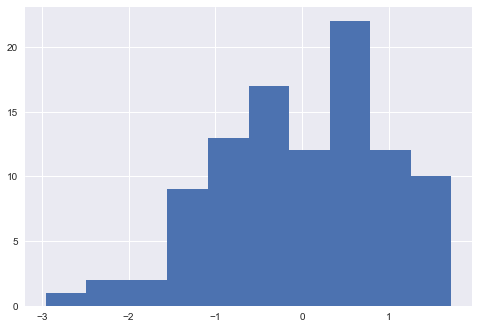

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Observe 100 data points from a Gaussian random variable with mean = 0.0 and variance = 1.0.
observations = np.random.normal(size = 100)
_ = plt.hist(observations)

It's tough to see, isn't it? Let's try 1000 observations.

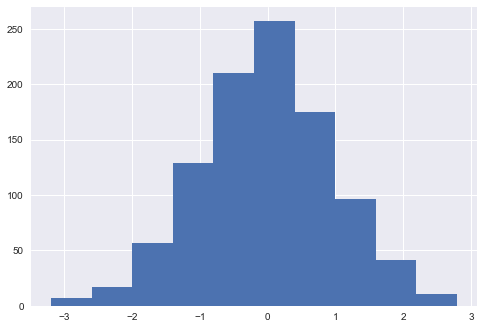

In [18]:
# Observe **1000** data points from a Gaussian random variable with mean = 0.0 and variance = 1.0.
observations = np.random.normal(size = 1000)
_ = plt.hist(observations)

That looks a little better! Maybe 10,000 data points, just for grins?

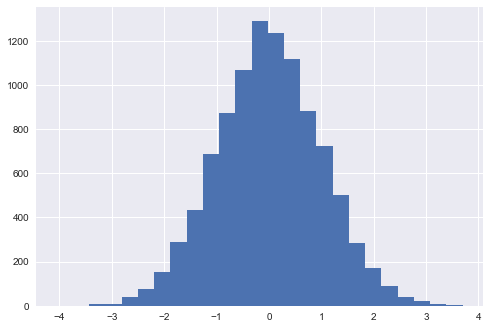

In [19]:
# Observe **** 10,000 **** data points from a Gaussian random variable with mean = 0.0 and variance = 1.0.
observations = np.random.normal(size = 10000)
_ = plt.hist(observations, bins = 25)

There's the bell curve we know and love!

### So what happened?

We had some observations $x$--a regular array with a bunch of numbers in it (10,000 by the end, to be exact). In fact, here's what the array looked like:

In [20]:
print(observations)

[ 0.4647916   1.0210127  -0.70636222 ..., -0.22549152  1.40617694
  1.00380714]


This could be any old dataset! In fact, forget for a moment that we generated this dataset ourselves, and instead think that this could be a dataset we picked up from the web.

We're able to compute some statistics from it: 

In [21]:
print("Mean: {:.2f}".format(observations.mean()))
print("Variance: {:.2f}".format(observations.var()))

Mean: 0.01
Variance: 0.99


You'll notice the mean is *very* close to 0, and the variance is likewise very close to 1. Since we ourselves set the mean and variance for the random number generator, we know that these are very close to the true mean and true variance, but in general we wouldn't necessarily know that.

Instead, we'd have computed the **sample mean** and **sample variance** from the data, as we did above, and then *assumed* the data to be Gaussian; after all, it certainly looks like a bell curve!

### Distributions

This brings us to *distributions*.

When we made those histograms of the observations, we were creating a distribution of the data.

The mean and variance statistics are *parameters* that govern the shape of those distributions.

Take a look at how the distribution changes when we change its parameters:

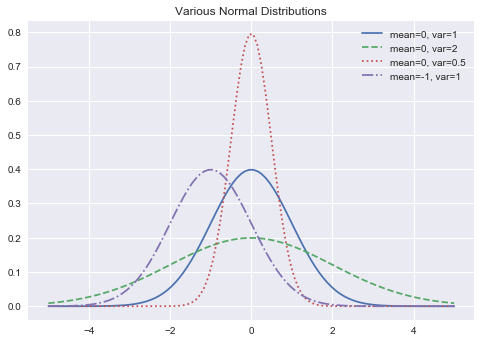

In [22]:
from scipy.stats import norm
xs = np.linspace(-5, 5, 100)
plt.plot(xs, norm.pdf(xs, loc = 0, scale = 1), '-', label = "mean=0, var=1")
plt.plot(xs, norm.pdf(xs, loc = 0, scale = 2), '--', label = "mean=0, var=2")
plt.plot(xs, norm.pdf(xs, loc = 0, scale = 0.5), ':', label = "mean=0, var=0.5")
plt.plot(xs, norm.pdf(xs, loc = -1, scale = 1), '-.', label = "mean=-1, var=1")
plt.legend(loc = 0)
plt.title("Various Normal Distributions")

Notice how changing the mean shifts the bell curve around along the x-axis, and changing the variance either squeezes the bell curve to be tall and skinny (small variance, tightly packed around the mean), or smashes it to be flat and short (large variance, spread out).

### Some notes

It's important to note: these shapes show what the distributions look like *in the limit* as the number of data points $n \rightarrow \infty $; more commonly, you'll have only a relatively smaller number of samples, more like the histograms we created of 100 and 1000 data points.

From this limited data, you'll make *assumptions* about the underlying governing distribution.

*Underlying* = *Latent*, or unknown!

Your assumptions will be key to solving data science problems, and solving for *latent variables* in the system: variables which you cannot observe directly, such as the mean and variance of the data distributions.

By and large, you'll have a limited data sample (hundreds or thousands of data points), you'll make an assumption about the underlying form of the data, compute statistics to summarize it, and use these statistics as stand-in representations for the *latent* variables of the system. **Hence, statistics!**

## Review Questions

Some questions to discuss and consider:

1: You have a very small dataset with a large variance. What first-order statistic would you use to summarize the data? Justify your answer.

2: *Correlation* is an analytical strategy to determine if, when one random variable changes, a second random variable also changes. Random variables can be positively correlated (as one goes up, the other goes up), negatively correlated (as one goes up, the other goes down), or uncorrelated (the behavior of one cannot predict the behavior of the other). Without consulting Google, what statistics that we have covered in this lecture do you think would be useful for computing correlation between two random variables? Why?

3: What differentiates anecdotal evidence from robust, statistically-significant evidence? Give some examples.

4: The astute reader may have noticed parallels between the steps of statistical rigor and the divisions of Greater Data Science from Lecture 1. Do you think this is a coincidence?

5: I take a survey of the 20 people in my class, asking each person their age. I note that the average reported age is 20.5, with a variance of 0.05. Using this information, I conclude the average age of all humans on the planet is around 20 or 21, with little variation. Where did I go wrong? Use the notation central to taking a statistical approach to answering questions.

## Course Administrivia

 - **A5 is due tonight at 11:59pm!** Post any questions to the Slack chat!

 - **Midterm grades should all be up.**

 - **A6 is out tomorrow! Due Monday, July 10.**

## Additional Resources

 1. Grus, Joel. *Data Science from Scratch*. 2015. ISBN-13: 978-1491901427
 2. Downey, Allen. *Think Stats: Probability and Statistics for Programmers*. 2011. ISBN-13: 978-1449307110